
# 项目：探索数据集-Gapminder World

## 目录
<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介

> Gapminder是一个非营利性组织，其建立旨在了解各个地区与国家在社会、经济和环境发展的统计数据与其他信息。通过使用Gapminder进行数据探索，可以有效地展示国家之间的发展差距。  
在本项目中，将使用Gapminder的数据，探索中国的GDP增长率、城市化发展程度、就业率、农业就业人口比例、教育程度之间是否变化如何。

In [1]:
#导入语句
import numpy as np
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt

#加载数据
#gpd年度总增长率
gdp_year = pd.read_csv('gdp_total_yearly_growth.csv')
#人均国内生产总值（以美元为单位，通货膨胀调整后）
gdp_per_cap = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')
#农业就业者占总就业人口比例
agri_total_per = pd.read_csv('agriculture_workers_percent_of_employment.csv')
#女性农业就业者占总女性就业人口比例
female_agri_per = pd.read_csv('female_agriculture_workers_percent_of_female_employment.csv')
#男性农业就业者占总女性就业人口比例
male_agri_per = pd.read_csv('male_agriculture_workers_percent_of_male_employment.csv')
#城镇人口占总人口百分比
urban_p_total_per = pd.read_csv('urban_population_percent_of_total.csv')
#成人（15周岁以上含15周岁）识字率
literacy_adult_per = pd.read_csv('literacy_rate_adult_total_percent_of_people_ages_15_and_above.csv')

<a id='wrangling'></a>
## 数据整理

### 合并数据集
>由于分析的主体是中国，需要先提取各个数据集中列为China的行，并为每个数据集添加一列type对数据进行备注

In [2]:
def set_df_type(df,type_value):
    df = df.query('country == "China"')
    df['type'] = type_value
    df = df.set_index(['type'])
    return df

In [3]:
gdp_year = set_df_type(gdp_year, 'gdp_year')
gdp_per_cap = set_df_type(gdp_per_cap,'gdp_per_cap')
agri_total_per = set_df_type(agri_total_per, 'agri_total_per')
female_agri_per = set_df_type(female_agri_per, 'female_agri_per')
male_agri_per = set_df_type(male_agri_per, 'male_agri_per')
urban_p_total_per = set_df_type(urban_p_total_per, 'urban_p_total_per')
literacy_adult_per = set_df_type(literacy_adult_per, 'literacy_adult_per')

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


### 常规属性

在这一部分，将会查看整理后的各个数据集的数据类型是否正确，并检查每个数据集的年份是否一致。

In [4]:
gdp_year.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, gdp_year to gdp_year
Columns: 214 entries, country to 2013
dtypes: float64(213), object(1)
memory usage: 1.7+ KB


GPD年度总增长率的数据描述，共有214列，从country列到2013列，其中country列数据类型为object，其他列数据类型为浮点数

In [5]:
gdp_year

,country,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
type,,,,,,,,,,,,,,,,,,,,,
gdp_year,China,0.837,0.837,0.837,0.837,0.837,0.837,0.837,0.837,0.837,...,10.2,10.1,12.4,11.2,2.2,7.5,7.34,5.56,7.6,7.6


>查看GDP年度总增长率的数据，可见数据从1801年开始，到2013年结束

In [6]:
gdp_per_cap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, gdp_per_cap to gdp_per_cap
Data columns (total 59 columns):
country    1 non-null object
1960       1 non-null float64
1961       1 non-null float64
1962       1 non-null float64
1963       1 non-null float64
1964       1 non-null float64
1965       1 non-null float64
1966       1 non-null float64
1967       1 non-null float64
1968       1 non-null float64
1969       1 non-null float64
1970       1 non-null float64
1971       1 non-null float64
1972       1 non-null float64
1973       1 non-null float64
1974       1 non-null float64
1975       1 non-null float64
1976       1 non-null float64
1977       1 non-null float64
1978       1 non-null float64
1979       1 non-null float64
1980       1 non-null float64
1981       1 non-null float64
1982       1 non-null float64
1983       1 non-null float64
1984       1 non-null float64
1985       1 non-null float64
1986       1 non-null float64
1987       1 non-null float64
1988       1 no

人均国内生产总值的数据描述，共有59列，从country列到2017列，其中country列数据类型为object，2010列为整数，其他列数据类型为浮点数

In [7]:
gdp_per_cap

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
type,,,,,,,,,,,,,,,,,,,,,
gdp_per_cap,China,192.0,141.0,132.0,142.0,164.0,187.0,202.0,185.0,173.0,...,3810.0,4140.0,4560,4970.0,5340.0,5720.0,6110.0,6500.0,6890.0,7330.0


>查看人均国内生产总值的数据，可见数据从1960年开始，至2017年结束

In [8]:
agri_total_per.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, agri_total_per to agri_total_per
Data columns (total 49 columns):
country    1 non-null object
1970       1 non-null float64
1971       0 non-null float64
1972       0 non-null float64
1973       0 non-null float64
1974       0 non-null float64
1975       1 non-null float64
1976       0 non-null float64
1977       0 non-null float64
1978       1 non-null float64
1979       1 non-null float64
1980       1 non-null float64
1981       1 non-null float64
1982       1 non-null float64
1983       1 non-null float64
1984       1 non-null float64
1985       1 non-null float64
1986       1 non-null float64
1987       1 non-null float64
1988       1 non-null float64
1989       1 non-null float64
1990       1 non-null float64
1991       1 non-null float64
1992       1 non-null float64
1993       1 non-null float64
1994       1 non-null float64
1995       1 non-null float64
1996       1 non-null float64
1997       1 non-null float64
1998     

>农业就业者占人口比例的数据描述，共有49列，从country列到2017列，其中country列数据类型为object，其他列数据类型为浮点数

In [9]:
agri_total_per

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
type,,,,,,,,,,,,,,,,,,,,,
agri_total_per,China,80.8,NaN,NaN,NaN,NaN,77.2,NaN,NaN,70.5,...,39.6,38.1,36.7,34.8,33.6,31.4,29.5,28.3,27.7,27.0


查看农业就业者占总人口比例数据，可见数据从1970年开始，至2017年结束

In [10]:
female_agri_per.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, female_agri_per to female_agri_per
Data columns (total 33 columns):
country    1 non-null object
1991       1 non-null float64
1992       1 non-null float64
1993       1 non-null float64
1994       1 non-null float64
1995       1 non-null float64
1996       1 non-null float64
1997       1 non-null float64
1998       1 non-null float64
1999       1 non-null float64
2000       1 non-null float64
2001       1 non-null float64
2002       1 non-null float64
2003       1 non-null float64
2004       1 non-null float64
2005       1 non-null float64
2006       1 non-null float64
2007       1 non-null float64
2008       1 non-null float64
2009       1 non-null float64
2010       1 non-null float64
2011       1 non-null float64
2012       1 non-null float64
2013       1 non-null float64
2014       1 non-null float64
2015       1 non-null float64
2016       1 non-null float64
2017       1 non-null float64
2018       1 non-null float64
2019   

女性农业就业者占总女性就业人口比例的数据描述，共有33列，从country列到2022列，其中country列数据类型为object，其他列数据类型为浮点数

In [11]:
female_agri_per

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
type,,,,,,,,,,,,,,,,,,,,,
female_agri_per,China,56.3,55.0,53.1,52.5,51.7,50.8,49.9,49.5,48.5,...,25.4,24.1,22.8,21.4,20.5,19.3,18.2,17.1,16.2,15.2


查看女性农业就业者占总女性就业人口比例的数据，可见数据从1991年开始，到2022年结束   
数据源显示，2018年以后数据均为预测

In [12]:
male_agri_per.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, male_agri_per to male_agri_per
Data columns (total 33 columns):
country    1 non-null object
1991       1 non-null float64
1992       1 non-null float64
1993       1 non-null float64
1994       1 non-null float64
1995       1 non-null float64
1996       1 non-null float64
1997       1 non-null float64
1998       1 non-null float64
1999       1 non-null float64
2000       1 non-null float64
2001       1 non-null float64
2002       1 non-null float64
2003       1 non-null float64
2004       1 non-null float64
2005       1 non-null float64
2006       1 non-null float64
2007       1 non-null float64
2008       1 non-null float64
2009       1 non-null float64
2010       1 non-null float64
2011       1 non-null float64
2012       1 non-null float64
2013       1 non-null float64
2014       1 non-null float64
2015       1 non-null float64
2016       1 non-null float64
2017       1 non-null float64
2018       1 non-null float64
2019       

男性农业就业者占总男性就业人口比例的数据描述，共有33列，从country列到2022列，其中country列数据类型为object，其他列数据类型为浮点数

In [13]:
male_agri_per

,country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
type,,,,,,,,,,,,,,,,,,,,,
male_agri_per,China,54.5,52.6,50.3,48.9,47.6,46.3,44.9,43.9,42.6,...,19.2,18.1,17.0,15.9,15.2,14.3,13.4,12.7,11.9,11.3


查看男性农业就业者占总男性就业人口比例的数据，可见数据从1991年开始，到2022年结束  
数据源显示，2018年以后数据均为预测

In [14]:
urban_p_total_per.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, urban_p_total_per to urban_p_total_per
Data columns (total 59 columns):
country    1 non-null object
1960       1 non-null float64
1961       1 non-null float64
1962       1 non-null float64
1963       1 non-null float64
1964       1 non-null float64
1965       1 non-null float64
1966       1 non-null float64
1967       1 non-null float64
1968       1 non-null float64
1969       1 non-null float64
1970       1 non-null float64
1971       1 non-null float64
1972       1 non-null float64
1973       1 non-null float64
1974       1 non-null float64
1975       1 non-null float64
1976       1 non-null float64
1977       1 non-null float64
1978       1 non-null float64
1979       1 non-null float64
1980       1 non-null float64
1981       1 non-null float64
1982       1 non-null float64
1983       1 non-null float64
1984       1 non-null float64
1985       1 non-null float64
1986       1 non-null float64
1987       1 non-null float64
198

城镇人口占总人口比例的数据描述，共有59列，从country列到2017列，其中country列数据类型为object，其他列数据类型为浮点数

In [15]:
urban_p_total_per

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
type,,,,,,,,,,,,,,,,,,,,,
urban_p_total_per,China,16.2,16.7,17.2,17.8,18.3,18.1,17.9,17.8,17.7,...,46.5,47.9,49.2,50.5,51.8,53.0,54.3,55.5,56.7,58.0


城镇人口占总人口比例的数据，可见数据从1960年开始，到2017年结束

In [16]:
literacy_adult_per.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, literacy_adult_per to literacy_adult_per
Data columns (total 38 columns):
country    1 non-null object
1975       0 non-null float64
1976       0 non-null float64
1977       0 non-null float64
1978       0 non-null float64
1979       0 non-null float64
1980       0 non-null float64
1981       0 non-null float64
1982       1 non-null float64
1983       0 non-null float64
1984       0 non-null float64
1985       0 non-null float64
1986       0 non-null float64
1987       0 non-null float64
1988       0 non-null float64
1989       0 non-null float64
1990       1 non-null float64
1991       0 non-null float64
1992       0 non-null float64
1993       0 non-null float64
1994       0 non-null float64
1995       0 non-null float64
1996       0 non-null float64
1997       0 non-null float64
1998       0 non-null float64
1999       0 non-null float64
2000       1 non-null float64
2001       0 non-null float64
2002       0 non-null float64
2

成人（15周岁以上，含15周岁）识字率的数据描述，共有38列，从country列到2011列，其中country列数据类型为object，其他列数据类型为浮点数

In [17]:
literacy_adult_per

,country,1975,1976,1977,1978,1979,1980,1981,1982,1983,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
type,,,,,,,,,,,,,,,,,,,,,
literacy_adult_per,China,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.1,NaN


成人（15周岁以上，含15周岁）识字率的数据，可见数据从1982年开始，到2011年结束  
其中，除1982年外，该数据集每10年统计一次数据

>上述分析总结如下：  

数据集名称 | 起始年份 | 结束年份 | 数据描述 |
---------- | -------- | -------- | -------- |
gdp_year | 1801 | 2013 | GDP年度总增长率 |
gdp_per_cap | 1960 | 2017 | 人均国内生产总值 |
agri_total_per |1970|2017 | 农业就业者占总人口比例 |
female_agri_per | 1991 | 2022 | 女性农业就业者占女性总人口比例 |
male_agri_per | 1991 | 2022 | 男性农业就业者占男性总人口比例 |
urban_p_total_per | 1960 | 2017 | 城镇人口占总人口比例 |
literacy_adult_per | 1982 | 2011 | 成人识字率（15周岁以上，含15周岁 |

### 数据清理

In [18]:
def data_clean(df):
    df_nan = df.isnull().any().sum()
    df_dup = df.duplicated().sum()
    return '该数据集共有缺失值{}，重复值{}。'.format(df_nan, df_dup)

In [19]:
data_clean(gdp_year)

'该数据集共有缺失值0，重复值0。'

In [20]:
data_clean(gdp_per_cap)

'该数据集共有缺失值0，重复值0。'

In [21]:
data_clean(agri_total_per)

'该数据集共有缺失值6，重复值0。'

In [22]:
data_clean(female_agri_per)

'该数据集共有缺失值0，重复值0。'

In [23]:
data_clean(male_agri_per)

'该数据集共有缺失值0，重复值0。'

In [24]:
data_clean(urban_p_total_per)

'该数据集共有缺失值0，重复值0。'

In [25]:
data_clean(literacy_adult_per)

'该数据集共有缺失值33，重复值0。'

In [26]:
agri_total_per.isnull()

,country,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
type,,,,,,,,,,,,,,,,,,,,,
agri_total_per,False,False,True,True,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False


从上述结果得出，仅agri_total_per和literacy_adult_per存在缺失值，所有数据集都不存在重复值。  
在1.3.2中，我们得知literacy_adule_per仅5个列存在对应的值，分别是country(object)，1982(float)，1990(float)，2000(float)，2010(float)，因此缺失值33基于该数据集10年统计一次的特征，是正常现象。  
agri_total_per中出现缺失值的年份分别是1971年-1974年，1976年和1977年。  
由于缺失值距离数据起始点较近，且该年份受政治事件及自然灾害影响较大，因此建议不清洗数据，并将1978年设为起始点。

其他数据源本身较为完整，因此在数据清洗中也无需进行过多操作。

In [27]:
#使用drop函数，删除1977以前的列
agri_total_per.drop(['1970','1971','1972','1973','1974','1975','1976','1977'], axis=1, inplace=True)

In [28]:
#检查agri_agri_total_per的缺失值与重复值
data_clean(agri_total_per)

'该数据集共有缺失值0，重复值0。'

<a id='eda'></a>
## 探索性数据分析

###  问题1：GDP年度总增长与人均国内生产总值是否呈正相关，与此同时，成人识字率产生了怎样的变化？

合并数据集

In [29]:
data_all = data_all = pd.concat([gdp_year, gdp_per_cap, agri_total_per, 
           female_agri_per, male_agri_per, urban_p_total_per,
          literacy_adult_per], sort=True)

In [30]:
data_all.drop(columns='country', inplace=True)

In [31]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, gdp_year to literacy_adult_per
Columns: 222 entries, 1801 to 2022
dtypes: float64(222)
memory usage: 12.2+ KB


提取三个数据“年份”对应的数据

In [32]:
gdp_year_data = data_all.iloc[0]
gdp_per_cap_data = data_all.iloc[1]
literacy_adult_per_data = data_all.iloc[-1]

In [33]:
df1 = pd.DataFrame({'gdp_year': gdp_year_data, 'gdp_per_cap': gdp_per_cap_data, 'literacy_adult_per': literacy_adult_per_data})

Text(0, 0.5, 'Data')

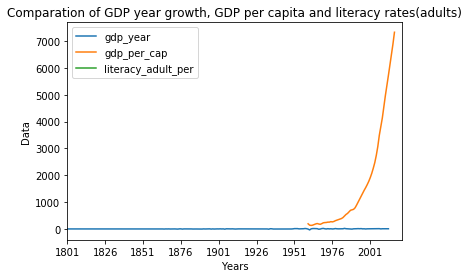

In [34]:
df1.plot(kind='line');
plt.title('Comparation of GDP year growth, GDP per capita and literacy rates(adults)')
plt.xlabel('Years')
plt.ylabel('Data')

由于数据单位不一致，数值范围也各不相同，因此，想要探究GDP年度总增长与人均国内生产总值是否呈正相关，需要单独查看各个图表

Text(0, 0.5, 'Percents')

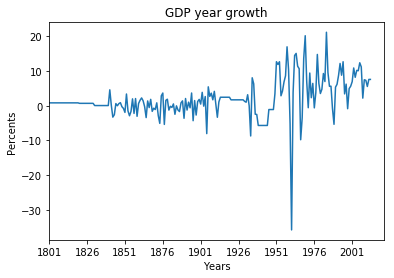

In [35]:
gdp_year_data.plot(kind='line', title='GDP year growth');
plt.xlabel('Years')
plt.ylabel('Percents')

自1801年到2013年，GDP年度总增长变化如上。  
由于人均国内生产总值的数据范围是1960年-2017年，为方便对比，将GDP年度总增长数据调整为以1960年为起始点。

Text(0, 0.5, 'Percents')

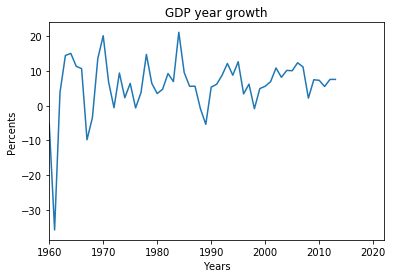

In [36]:
gdp_year_data = gdp_year_data['1960':'2022']
gdp_year_data.plot(kind='line', title='GDP year growth');
plt.xlabel('Years')
plt.ylabel('Percents')

从上述图标中可见，GDP年度总增长变化浮动较大，下面使用移动平均数来查看总体趋势。  
如下图，粒度选择10，可见自1960年后，GDP年度总增长趋势为整体上升。

Text(0, 0.5, 'Percents')

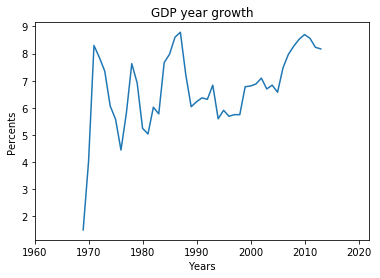

In [37]:
gdp_year_data_mean_10 =gdp_year_data.rolling(window=10).mean()
gdp_year_data_mean_10.plot(kind='line', title='GDP year growth');
plt.xlabel('Years')
plt.ylabel('Percents')

Text(0, 0.5, 'Dollars')

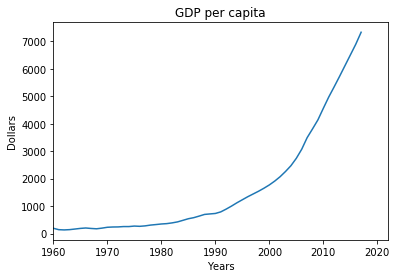

In [38]:
gdp_per_cap_data = gdp_per_cap_data['1960':'2022']
gdp_per_cap_data.plot(kind='line', title='GDP per capita');
plt.xlabel('Years')
plt.ylabel('Dollars')

>如上图所示，人均国内生产总值变化趋势为整体上升

Text(0, 0.5, 'Percent')

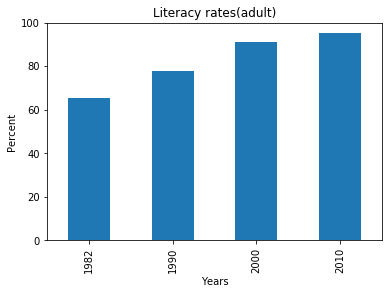

In [39]:
literacy_adult_per_data = literacy_adult_per_data.dropna()
literacy_adult_per_data.plot(kind='bar', title='Literacy rates(adult)');
plt.xlabel('Years')
plt.ylabel('Percent')

自1982年起，根据数据显示（每10年统计一次），成人识字率也呈上升趋势。

### 问题2：城镇人口占总人口比例变化如何？农业就业人口比例是否与城镇人口变化呈相关关系？于此同时，男性农业就业人口和女性农业就业人口又产生了怎样的变化？

提取四个数据“年份”对应的数据

In [40]:
urban_p_total_per_data = data_all.iloc[-2]
agri_total_per_data = data_all.iloc[2]
female_agri_per_data = data_all.iloc[3]
male_agri_per_data = data_all.iloc[4]

合并数据集

In [41]:
df2 = pd.DataFrame({'urban_p_total_per': urban_p_total_per_data, 'agri_total_per': agri_total_per_data,
                  'female_agri_per': female_agri_per_data, 'male_agri_per': male_agri_per_data})

由于四个数据集起始点最早于1960年，且四个数据集的数据单位都为百分比（%），接下来只需对df2的年份进行处理，即可通过直接对比得出结果

Text(0, 0.5, 'Percent')

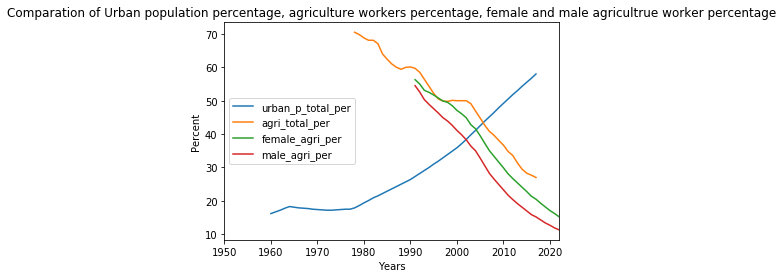

In [42]:
df2 = df2.loc['1950': '2030']
df2.plot(kind='line', title='Comparation of Urban population percentage, agriculture workers percentage, female and male agricultrue worker percentage');
plt.xlabel('Years')
plt.ylabel('Percent')

Text(0, 0.5, 'Percent')

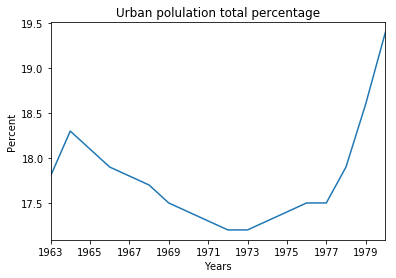

In [43]:
urban_p_total_per_data.loc['1963': '1980'].plot(kind='line',title='Urban polulation total percentage');
plt.xlabel('Years')
plt.ylabel('Percent')

<a id='conclusions'></a>
## 结论
### 问题1：GDP年度总增长与人均国内生产总值是否呈正相关，与此同时，成人识字率产生了怎样的变化？
**回答**：从上面分析中，可以得出GDP年度总增长与人口国内生产总值整体都是整体上升，但GDP年度总增长波动较大，二者并非严格的正相关关系。  
与此同时，在1982年-2010年的将近30年终，成人识字率也得到了显著提高（虽然数据源仅又5个值，也即每10年记录一次）。

### 问题2：城镇人口占总人口比例变化如何？农业就业人口比例是否与城镇人口变化呈相关关系？与此同时，男性农业就业人口和女性农业就业人口又产生了怎样的变化？
**回答**：城镇人口占总人口比例整体上升，但1963年至1972年呈现明显下降，随后又稳步上升；从整体上看，农业就业人口比例与城镇人口比例呈负相关关系，但在1980，1990，2000年，农业就业人口也出现过短暂的上升；自1990年起，随着城镇人口的上升，男性农业就业人口及女性农业就业人口出现了显著下降。

### 局限性：  
1. 源数据集的起始年份并非完全对称，如GDP年度总增长率包含了1801年-2013年的数据，而其他数据集则只从20世纪后半叶开始，因此想要探索19世纪的情况缺乏了相应的数据。
2. 女性农业就业者及男性农业就业者数据仅从1991年开始，此时中国城市化进行已在进行中，因此难以从数据中探索出不一样的回答。
3. 成人识字率也有着上述相类似情况，数据源自1982年开始，仅10年统计一次，很难从中长时间的、细节性的变化。

In [44]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295